# Distribuzioni coniugate (1) {#sec-congiugate-families-1}

**Prerequisiti**

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import arviz as az
import seaborn as sns
from scipy import stats
from scipy.integrate import trapezoid

In [4]:
seed: int = sum(map(ord, "distribuzioni_coniugate_1"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo, esploriamo il concetto di **distribuzioni a priori coniugate** e il loro ruolo nell'inferenza bayesiana. Utilizzando il **modello beta-binomiale** come esempio paradigmatico, dimostreremo come queste distribuzioni semplifichino l'analisi attraverso calcoli analitici diretti. L'uso di una distribuzione a priori coniugata non solo rende l'inferenza più agevole, ma fornisce anche una chiara visione del modo in cui le credenze a priori influenzano le conclusioni.

Per favorire la comprensione, procederemo in tre fasi principali:

1. Introduzione del modello beta-binomiale.
2. Analisi della distribuzione Beta e del suo ruolo come distribuzione a priori.
3. Descrizione del processo di aggiornamento bayesiano e dei vantaggi derivanti dall'uso di distribuzioni coniugate.

## Il Modello Beta-Binomiale 

Il **modello beta-binomiale** è un esempio classico per analizzare una proporzione $\theta$, ossia la probabilità di successo in una sequenza di prove binarie (ad esempio, successo/fallimento). Supponiamo di osservare $y$ successi su $n$ prove, dove ogni prova è indipendente e con la stessa probabilità di successo $\theta$, che appartiene all'intervallo $[0,1]$.

La funzione di verosimiglianza, basata sulla distribuzione binomiale, è espressa come:

$$
\text{Bin}(y \mid n, \theta) = \binom{n}{y} \theta^y (1 - \theta)^{n - y},
$$

dove $\binom{n}{y}$ è il coefficiente binomiale che conta il numero di modi in cui $y$ successi possono verificarsi in $n$ prove.

Per modellare la nostra conoscenza preliminare su $\theta$, scegliamo una distribuzione a priori **Beta**, che rappresenta un'ampia gamma di credenze iniziali con parametri flessibili.

## La Distribuzione Beta: Un Prior Flessibile

La distribuzione Beta è definita come:

$$
\text{Beta}(\theta \mid \alpha, \beta) = \frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}, \quad \text{con } \theta \in (0, 1),
$$

dove:

- $\alpha > 0$ e $\beta > 0$ sono i **iperparametri**, che determinano la forma della distribuzione.
- $B(\alpha, \beta)$ è la **funzione Beta di Eulero**, calcolata come:

    $$
    B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)},
    $$

    dove $\Gamma(x)$ è la funzione Gamma, una generalizzazione del fattoriale.

### Interpretazione Intuitiva di $\alpha$ e $\beta$

Nel contesto bayesiano:

- $\alpha -1$ rappresenta il numero ipotetico di "successi" a priori.
- $\beta -1$ rappresenta il numero ipotetico di "fallimenti" a priori.

Ad esempio:

- Una distribuzione **Beta(1, 1)** è uniforme (0 successi a priori e 0 fallimenti), indicando totale incertezza iniziale (assenza di credenze informate).
- Una distribuzione **Beta(10, 20)** rappresenta una conoscenza a priori basata su 9 successi e 19 fallimenti ipotizzati, indicando una convinzione iniziale relativamente solida, poiché deriva da un totale di 28 osservazioni virtuali che riflettono le credenze precedenti.

Questa interpretazione consente di calibrare le credenze a priori in base all'evidenza disponibile o alla fiducia nella stima.

### Flessibilità della Distribuzione Beta

La distribuzione Beta è estremamente versatile:

- **Forma:** Valori diversi di $\alpha$ e $\beta$ producono distribuzioni simmetriche, asimmetriche o uniformi.
- **Forza del prior:** Valori elevati di $\alpha$ e $\beta$ riducono la varianza, riflettendo credenze più forti.

Questa flessibilità rende la distribuzione Beta una scelta ideale per rappresentare credenze iniziali su proporzioni.

## Aggiornamento Bayesiano

L'aggiornamento bayesiano combina le informazioni iniziali (priori) con i dati osservati (verosimiglianza) per produrre una nuova distribuzione delle credenze (posteriori). Nel caso del modello beta-binomiale, questo processo è particolarmente semplice grazie alla "coniugazione": il prior Beta e la verosimiglianza Binomiale producono una distribuzione a posteriori che appartiene ancora alla famiglia Beta. 

### Problema
Se osserviamo $y$ successi su $n$ prove, vogliamo aggiornare il nostro prior Beta con i dati osservati per ottenere una distribuzione a posteriori Beta. I parametri aggiornati della distribuzione a posteriori sono:

$$
\alpha' = \alpha + y, \quad \beta' = \beta + n - y.
$$

Vediamo in dettaglio come si arriva a questo risultato.

### Passaggi dell'Aggiornamento Bayesiano

**1. Formula di Bayes**

La regola di Bayes afferma che:

$$
\text{Posterior} \propto \text{Prior} \times \text{Verosimiglianza},
$$

dove $\propto$ indica "proporzionale a". Qui ci concentriamo sui termini che dipendono dal parametro di interesse, $\theta$, la probabilità di successo.

**2. Espressione del Prior**

Il prior è una distribuzione Beta, definita come:

$$
\text{Prior} = \theta^{\alpha-1} (1-\theta)^{\beta-1},
$$

dove:

- $\theta$ rappresenta la probabilità di successo,
- $\alpha$ e $\beta$ sono parametri che descrivono le nostre convinzioni iniziali:
  - $\alpha$: il numero di successi attesi *prima* di osservare i dati,
  - $\beta$: il numero di insuccessi attesi *prima* di osservare i dati.

**3. Espressione della Verosimiglianza**

La verosimiglianza è data dalla distribuzione Binomiale, che rappresenta la probabilità di osservare $y$ successi su $n$ prove:

$$
\text{Verosimiglianza} = \theta^y (1-\theta)^{n-y},
$$

dove:

- $y$ è il numero di successi osservati,
- $n$ è il numero totale di prove,
- $\theta$ è la probabilità di successo (il parametro che stiamo aggiornando).

**4. Moltiplicazione di Prior e Verosimiglianza**

Combinando prior e verosimiglianza, otteniamo:

$$
\text{Posterior} \propto \underbrace{\theta^{\alpha-1} (1-\theta)^{\beta-1}}_{\text{Prior}} \times \underbrace{\theta^y (1-\theta)^{n-y}}_{\text{Verosimiglianza}}.
$$

**5. Raggruppamento dei termini**

Moltiplicando i termini simili, raggruppiamo gli esponenti di $\theta$ e $1-\theta$:

$$
\text{Posterior} \propto \theta^{(\alpha-1) + y} (1-\theta)^{(\beta-1) + (n-y)}.
$$

**6. Forma finale**

Semplificando gli esponenti:

$$
\text{Posterior} \propto \theta^{\alpha + y - 1} (1-\theta)^{\beta + n - y - 1}.
$$

Questa è la forma di una distribuzione Beta con nuovi parametri:

$$
\alpha' = \alpha + y, \quad \beta' = \beta + n - y.
$$

**7. Normalizzazione**

Per trasformare questa espressione in una distribuzione di probabilità vera e propria, dobbiamo dividere per una costante di normalizzazione. La funzione Beta, $B(\alpha', \beta')$, normalizza la distribuzione:

$$
p(\theta | y, n) = \frac{\theta^{\alpha' - 1} (1-\theta)^{\beta' - 1}}{B(\alpha', \beta')},
$$

dove $B(\alpha', \beta')$ è definita come:

$$
B(\alpha', \beta') = \int_0^1 \theta^{\alpha' - 1} (1-\theta)^{\beta' - 1} \, d\theta.
$$

Tuttavia, non dobbiamo calcolarla esplicitamente poiché sappiamo già che il risultato è una distribuzione Beta.

**8. Parametri aggiornati**

In conclusione, i parametri aggiornati sono:

- **Nuovo $\alpha'$:** $\alpha + y$, che somma al vecchio $\alpha$ il numero di successi osservati ($y$).
- **Nuovo $\beta'$:** $\beta + n - y$, che somma al vecchio $\beta$ il numero di insuccessi osservati ($n-y$). 

### Vantaggi del Modello Beta-Binomiale

Il modello beta-binomiale presenta diversi vantaggi:

1. **Semplicità analitica:** La distribuzione a posteriori appartiene alla stessa famiglia della distribuzione a priori, evitando calcoli complessi.
2. **Interpretazione trasparente:** L'aggiornamento dei parametri $\alpha$ e $\beta$ mostra chiaramente come i dati influenzino le credenze.

Nonostante la semplicità, le distribuzioni a priori coniugate non sempre rappresentano credenze realistiche. Tecniche moderne come il campionamento Monte Carlo consentono di usare distribuzioni a priori più complesse, ma il modello beta-binomiale rimane un esempio didattico fondamentale per comprendere l'inferenza bayesiana.

In conclusione, il modello beta-binomiale illustra chiaramente come le distribuzioni a priori coniugate possano semplificare l'inferenza bayesiana e fornire una comprensione intuitiva dell'interazione tra prior e dati. Questo modello rappresenta un punto di partenza ideale per approfondire l'approccio bayesiano e prepararsi a concetti più avanzati.

::: {#exm-}
In un esempio ispirato da @McElreath_rethinking nel suo libro "Statistical Rethinking", consideriamo un esperimento dove otteniamo 6 successi (indicati come "acqua") su un totale di 9 prove (immaginate come lanci di un mappamondo). La verosimiglianza binomiale per questo esperimento è data da:

$$
\theta^y (1-\theta)^{n-y},
$$

dove $y = 6$ è il numero di successi e $n = 9$ è il numero totale di prove.

Se scegliamo una distribuzione a priori Beta con parametri $\alpha = 2$ e $\beta = 2$, possiamo utilizzare l'aggiornamento bayesiano per calcolare i parametri della distribuzione a posteriori, dato l'esito delle nostre prove. L'applicazione del teorema di Bayes porta a una distribuzione a posteriori Beta con i parametri aggiornati $\alpha' = \alpha + y = 8$ e $\beta' = \beta + n - y = 5$.

Ora, vediamo come visualizzare le tre distribuzioni di interesse: la distribuzione a priori Beta($2, 2$), la verosimiglianza binomiale per $y=6$ e $n=9$, e la distribuzione a posteriori Beta($8, 5$). 

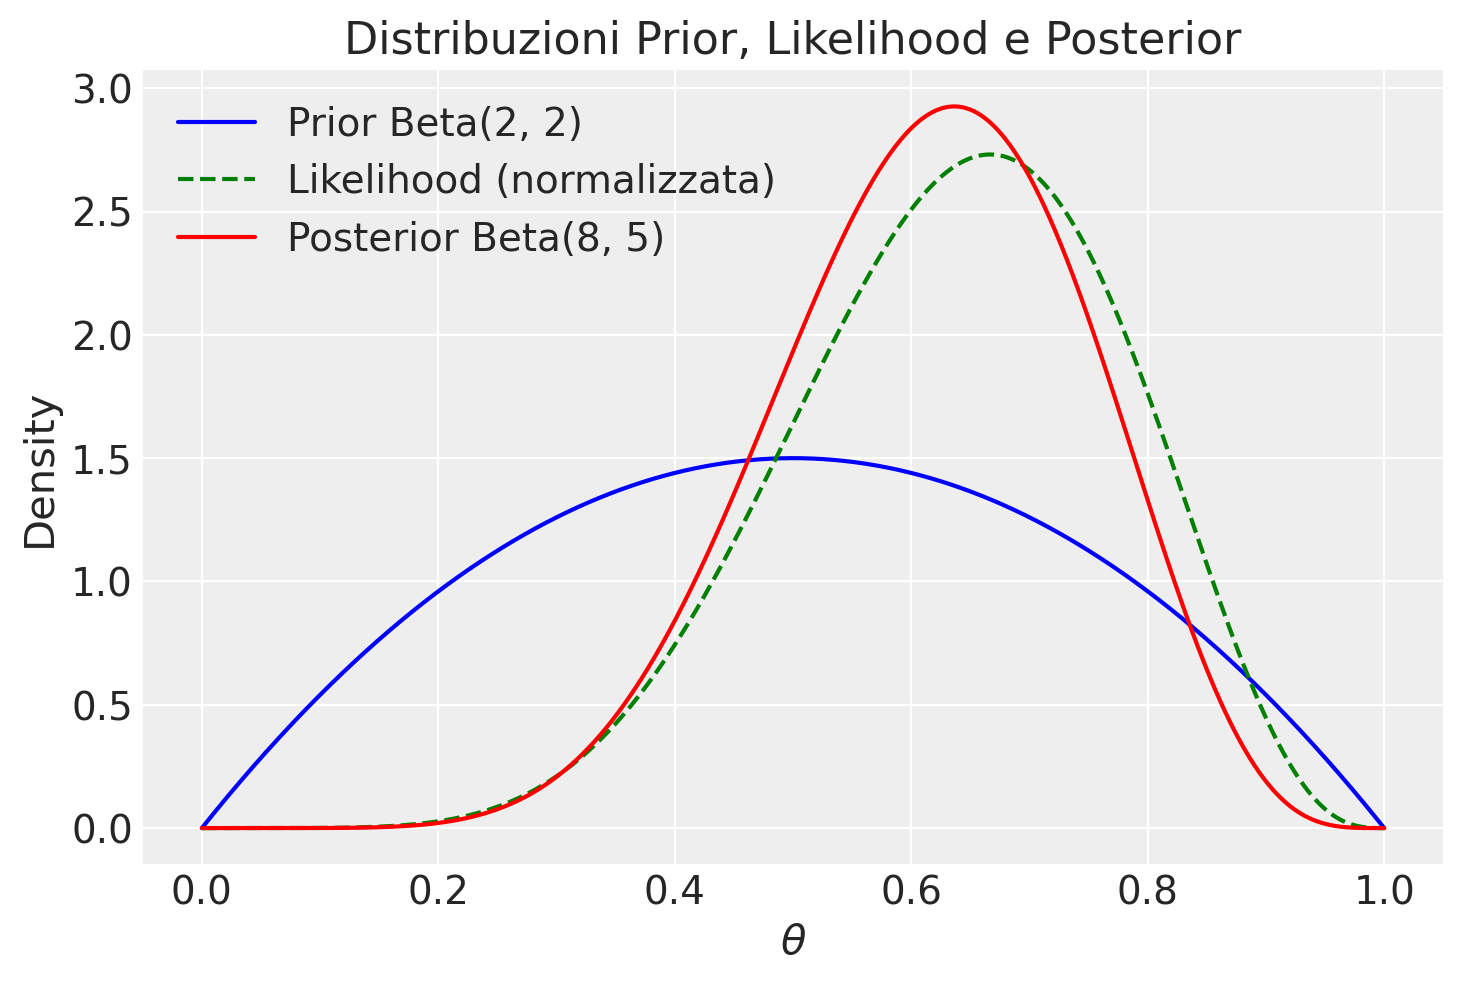

In [3]:
# Definiamo i parametri
alpha_prior, beta_prior = 2, 2
y, n = 6, 9
alpha_post, beta_post = alpha_prior + y, beta_prior + n - y

# Creiamo un array di valori theta
theta = np.linspace(0, 1, 1000)  # Aumentiamo la risoluzione per un calcolo più preciso

# Calcoliamo le PDF
prior_pdf = stats.beta.pdf(theta, alpha_prior, beta_prior)
likelihood = theta**y * (1-theta)**(n-y)

# Normalizziamo la verosimiglianza
likelihood_integral = trapezoid(likelihood, theta)
normalized_likelihood = likelihood / likelihood_integral

posterior_pdf = stats.beta.pdf(theta, alpha_post, beta_post)

# Disegnamo le distribuzioni
plt.plot(theta, prior_pdf, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='blue')
plt.plot(theta, normalized_likelihood, label='Likelihood (normalizzata)', linestyle='--', color='green')
plt.plot(theta, posterior_pdf, label=f'Posterior Beta({alpha_post}, {beta_post})', color='red')

plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.title('Distribuzioni Prior, Likelihood e Posterior')
_ = plt.legend()

In questo codice, la funzione `trapezoid` viene usata per calcolare l'integrale della funzione di verosimiglianza non normalizzata su θ, fornendo il fattore di normalizzazione. Dividendo la funzione di verosimiglianza per questo fattore, otteniamo una funzione di verosimiglianza normalizzata, il cui integrale su [0, 1] è uguale a 1. La normalizzazione della verosimiglianza è eseguita solo a scopo di visualizzazione, per facilitare il confronto tra le curve. 

:::

::: {#exm-}

Esaminiamo ora un esempio discuso da @Johnson2022bayesrules. In uno studio molto famoso, Stanley Milgram ha studiato la propensione delle persone a obbedire agli ordini delle figure di autorità, anche quando tali ordini potrebbero danneggiare altre persone (Milgram 1963). Nell'articolo, Milgram descrive lo studio come

> consistente nell'ordinare a un soggetto ingenuo di somministrare una scossa elettrica a una vittima. Viene utilizzato un generatore di scosse simulato, con 30 livelli di tensione chiaramente contrassegnati che vanno da IS a 450 volt. Lo strumento porta delle designazioni verbali che vanno da Scossa Lieve a Pericolo: Scossa Grave. Le risposte della vittima, che è un complice addestrato dell'esperimentatore, sono standardizzate. Gli ordini di somministrare scosse vengono dati al soggetto ingenuo nel contesto di un 'esperimento di apprendimento' apparentemente organizzato per studiare gli effetti della punizione sulla memoria. Man mano che l'esperimento procede, al soggetto ingenuo viene ordinato di somministrare scosse sempre più intense alla vittima, fino al punto di raggiungere il livello contrassegnato Pericolo: Scossa Grave.

In altre parole, ai partecipanti allo studio veniva dato il compito di testare un altro partecipante (che in realtà era un attore addestrato) sulla loro capacità di memorizzare una serie di item. Se l'attore non ricordava un item, al partecipante veniva ordinato di somministrare una scossa all'attore e di aumentare il livello della scossa con ogni fallimento successivo. I partecipanti non erano consapevoli del fatto che le scosse fossero finte e che l'attore stesse solo fingendo di provare dolore dalla scossa.

Nello studio di Milgram, 26 partecipanti su 40 hanno somministrato scosse al livello "Pericolo: Scossa Grave". Il problema richiede di costruire la distribuzione a posteriori della probabilità $\theta$ di infliggere una scossa a l livello "Pericolo: Scossa Grave", ipotizzando che uno studio precedente aveva stabilito che $\theta$ segue una distribuzione Beta(1, 10).

Iniziamo a fornire una rappresentazione grafica della distribuzione a priori.

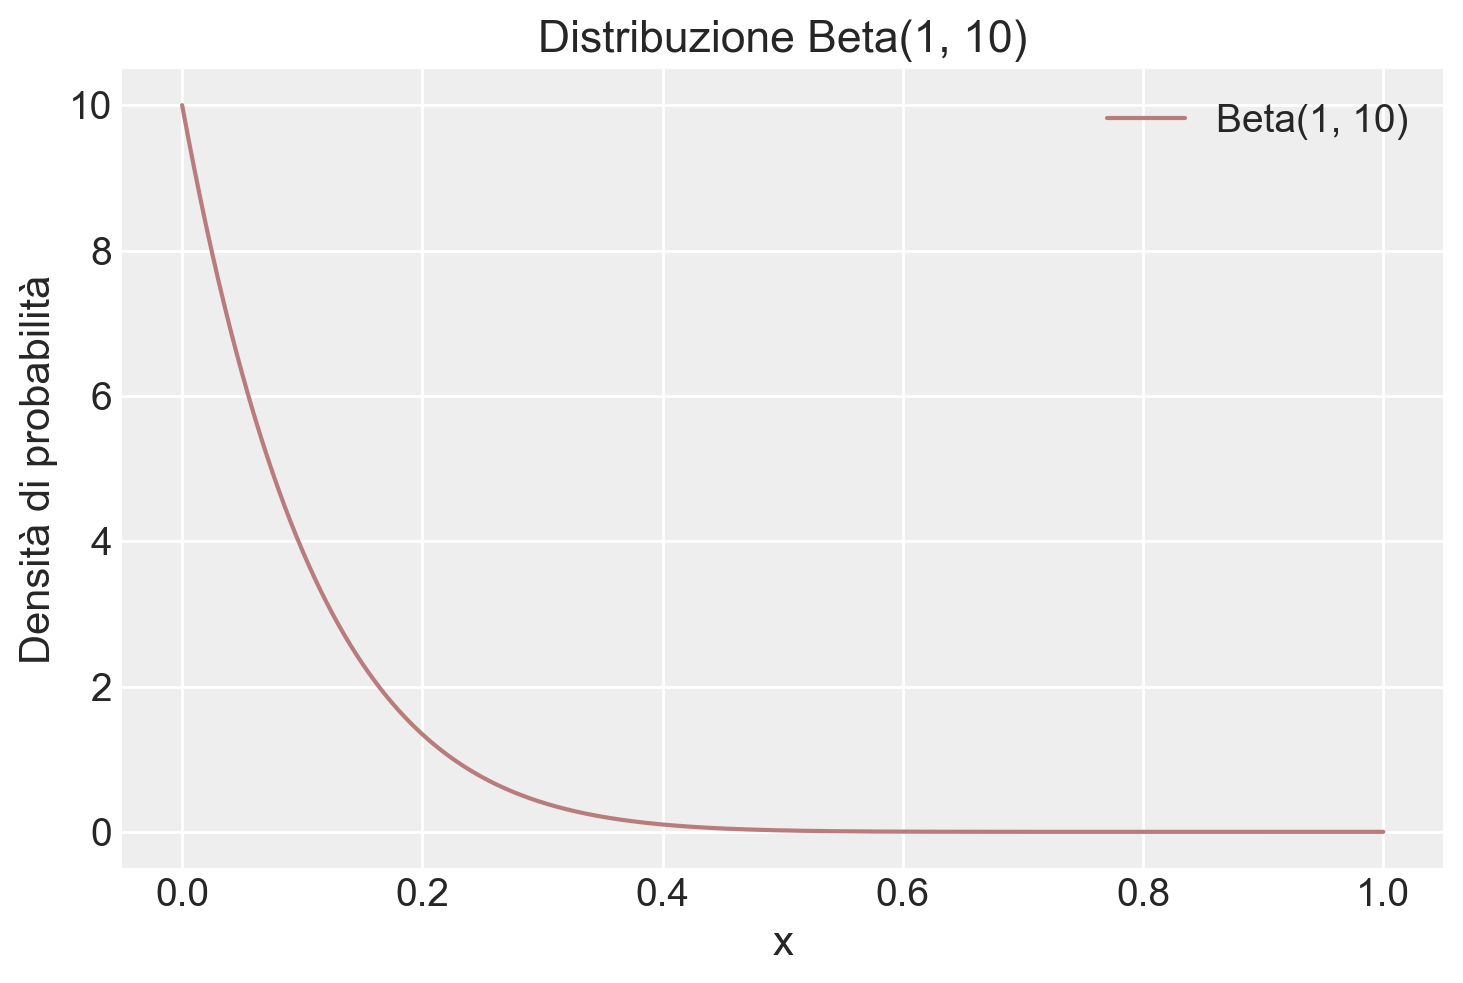

In [8]:
# Impostazione dei parametri della distribuzione Beta
alpha = 1
beta_val = 10

# Creazione di valori x per il plot
x_values = np.linspace(0, 1, 1000)

# Calcolo della densità di probabilità per ogni valore di x
beta_pdf = stats.beta.pdf(x_values, alpha, beta_val)

# Plot della densità di probabilità
color_fill = "#b97c7c"
plt.plot(x_values, beta_pdf, label='Beta(1, 10)', color=color_fill)
plt.title('Distribuzione Beta(1, 10)')
plt.xlabel('x')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.show()

La distribuzione a posteriori è una Beta di parametri aggiornati

In [9]:
y = 26
n = 40

alpha_prior = 1
beta_prior = 10

alpha_post = alpha_prior + y
beta_post = beta_prior + n - y

alpha_post, beta_post

(27, 24)

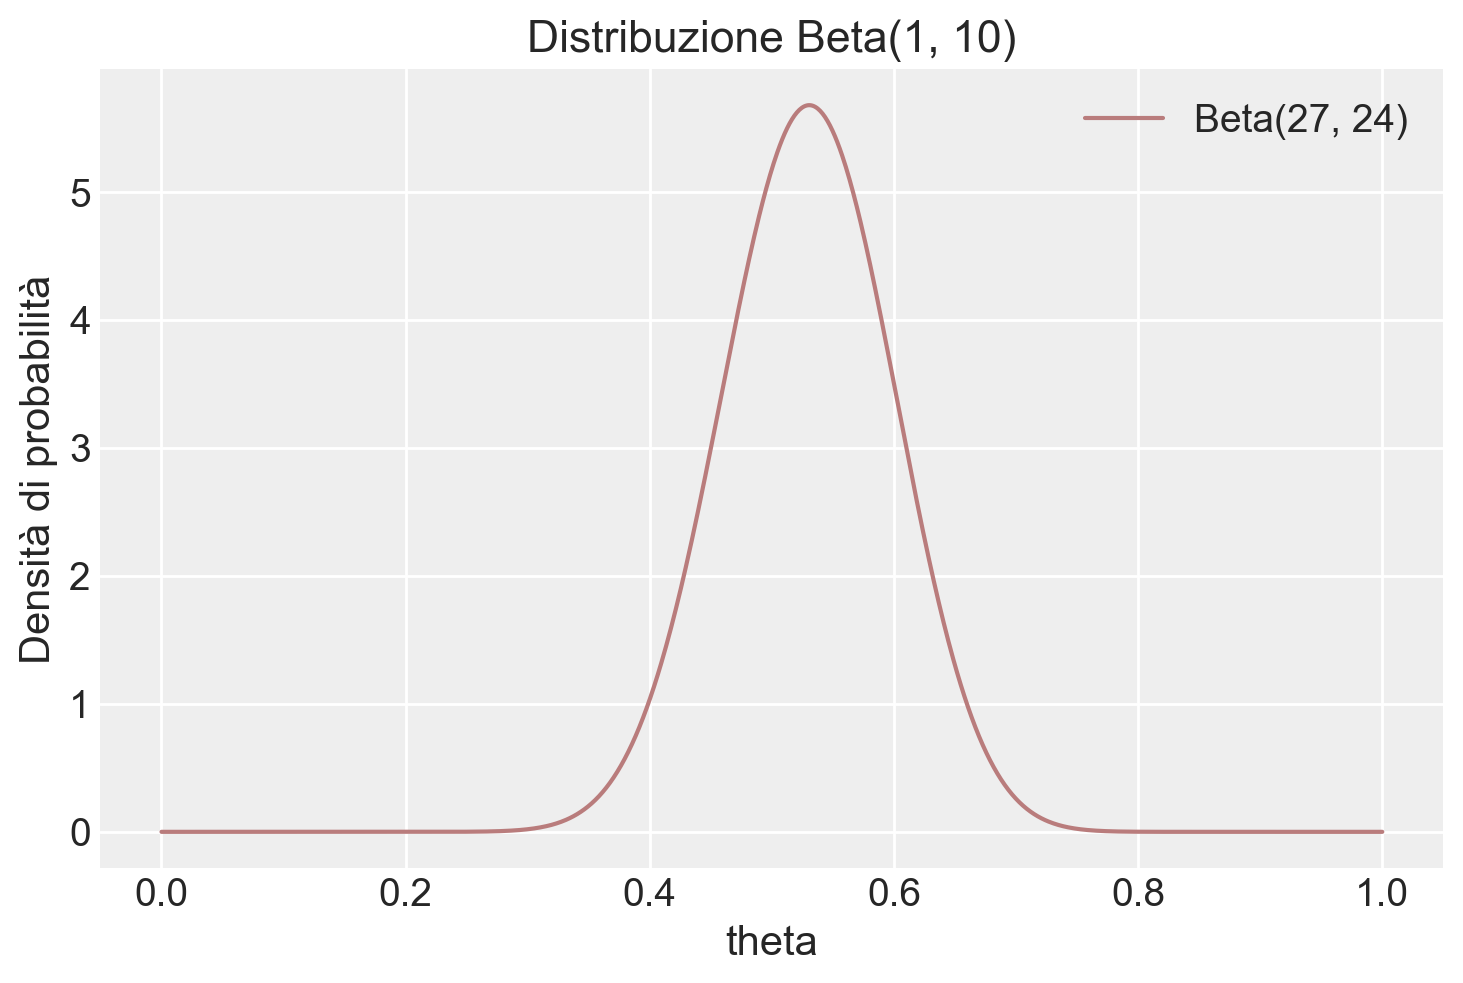

In [10]:
# Creazione di valori x per il plot
x_values = np.linspace(0, 1, 1000)

# Calcolo della densità di probabilità per ogni valore di x
beta_pdf = stats.beta.pdf(x_values, alpha_post, beta_post)

# Plot della densità di probabilità
plt.plot(x_values, beta_pdf, label='Beta(27, 24)', color=color_fill)
plt.title('Distribuzione Beta(1, 10)')
plt.xlabel('theta')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.show()

Calcoliamo la media a posteriori di $\theta$:

In [7]:
alpha_post / (alpha_post + beta_post)

0.5294117647058824

Calcoliamo la moda a posteriori:

In [8]:
(alpha_post - 1) / (alpha_post + beta_post - 2)

0.5306122448979592

Calcoliamo la probabilità che $\theta > 0.6$

In [9]:
stats.beta.sf(0.6, alpha_post, beta_post)

0.15616833089995472

ovvero

In [10]:
1 - stats.beta.cdf(0.6, alpha_post, beta_post)

0.15616833089995474

Svolgiamo ora il problema usando il metodo basato su griglia. Definiamo la griglia di interesse:

In [12]:
theta = np.linspace(0, 1, 100)

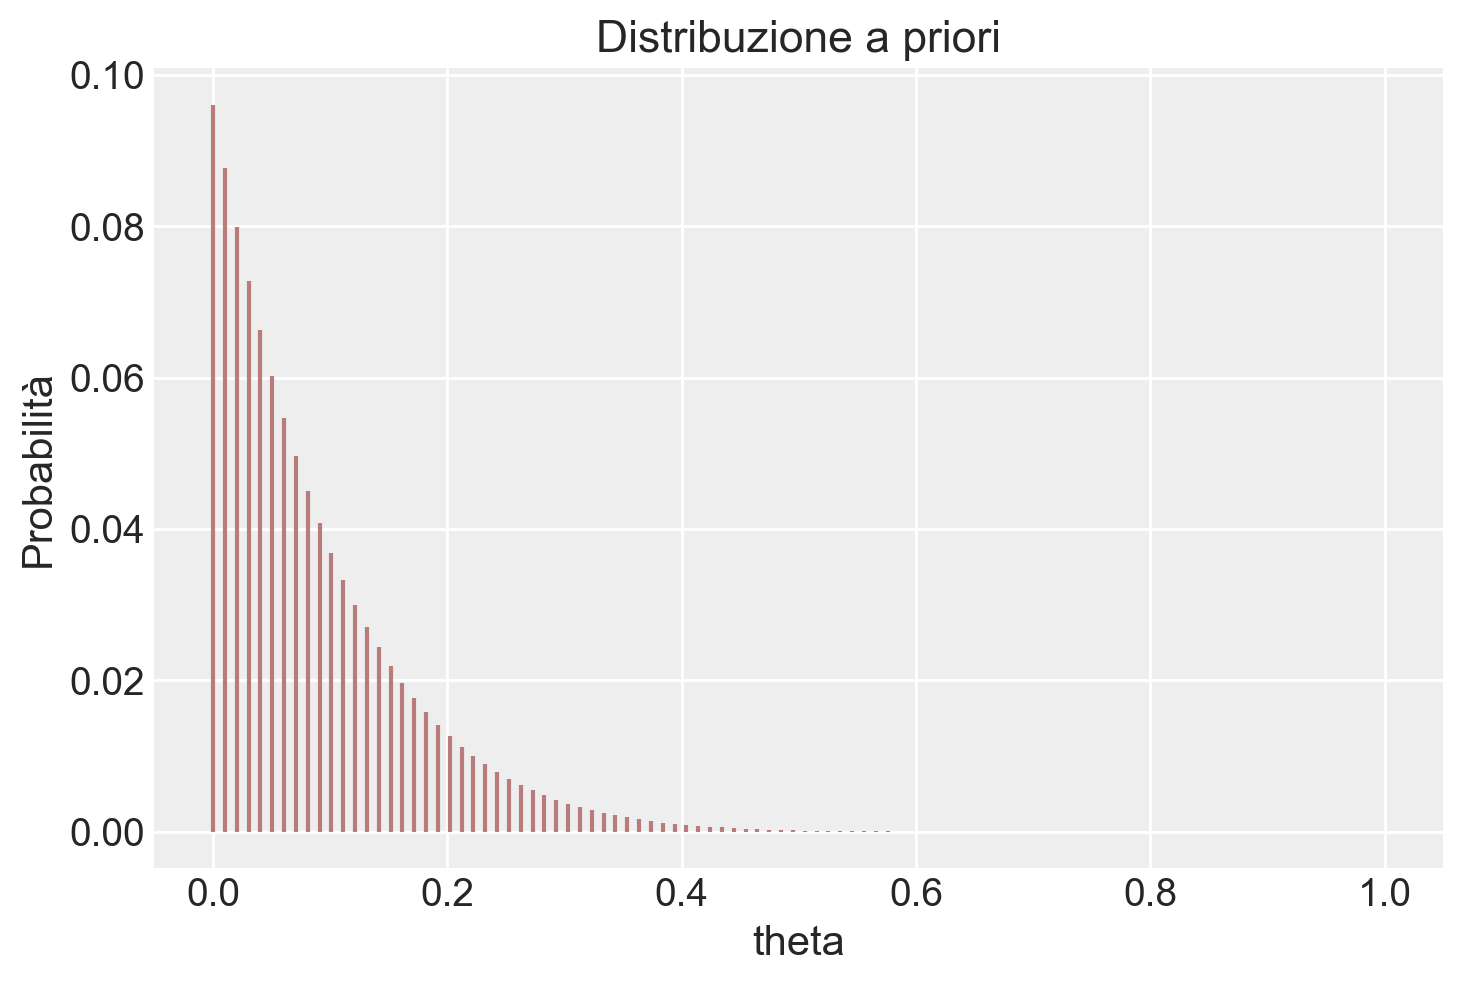

In [13]:
alpha_prior = 1  
beta_prior = 10   

# Calcolo della PDF della distribuzione Beta per i valori x
prior = stats.beta.pdf(theta, alpha_prior, beta_prior)

plt.vlines(theta, 0, prior / np.sum(prior), color=color_fill, linestyle='-')
plt.xlabel('theta')
plt.ylabel('Probabilità')
plt.title('Distribuzione a priori')

plt.show()

Creiamo la verosimiglianza.

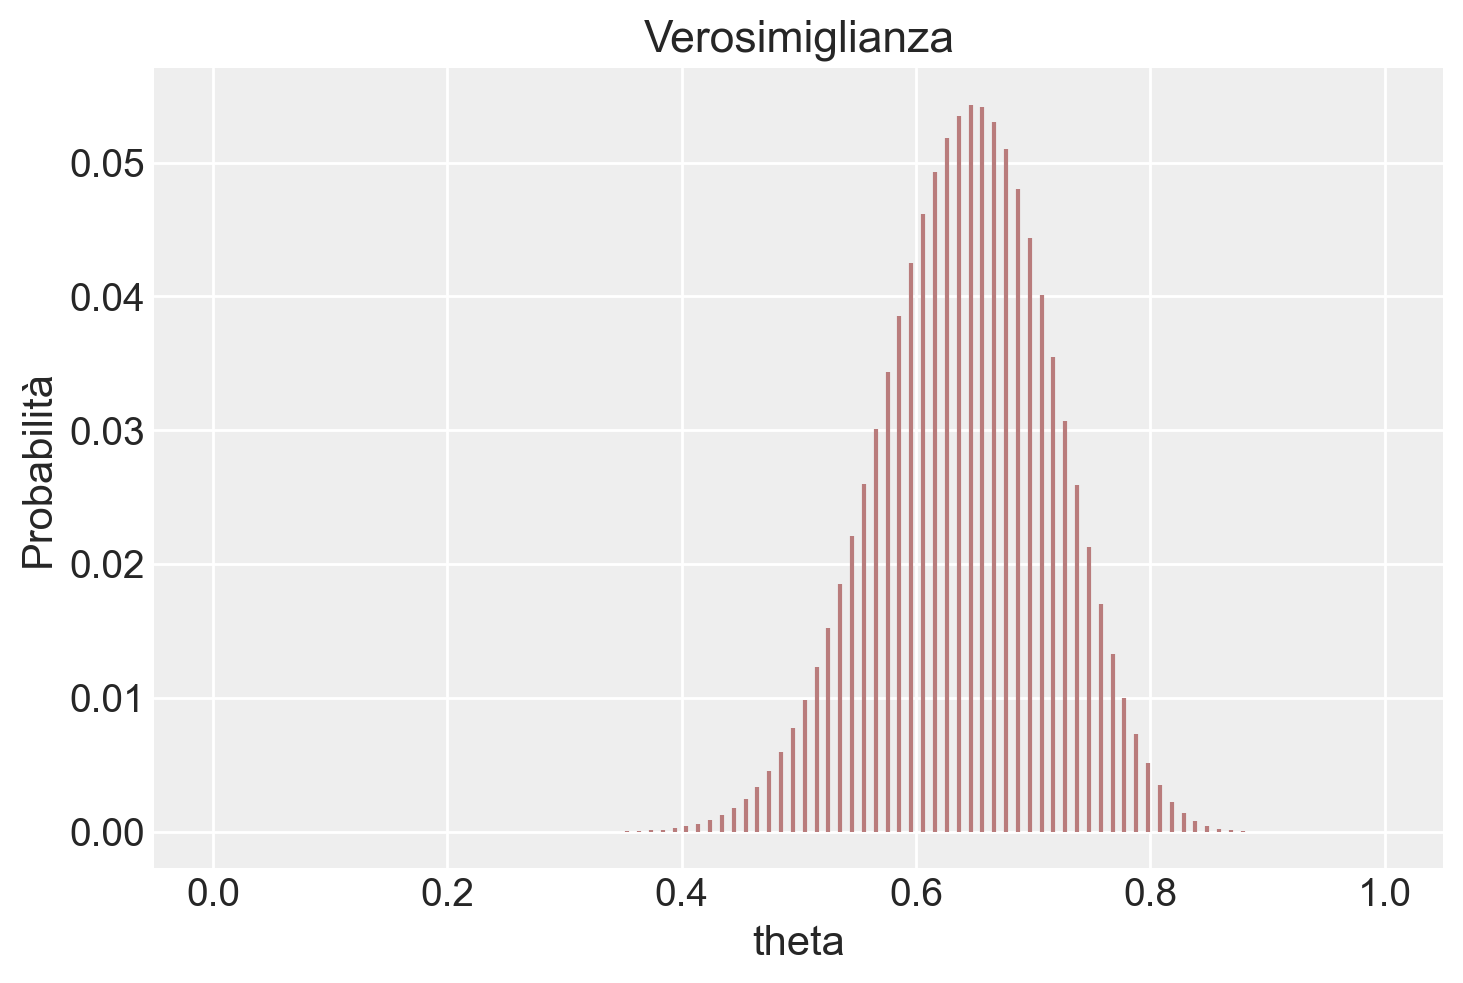

In [14]:
lk = stats.binom.pmf(y, n, theta)

plt.vlines(theta, 0, lk / np.sum(lk), color=color_fill, linestyle='-')
plt.xlabel('theta')
plt.ylabel('Probabilità')
plt.title('Verosimiglianza')

plt.show()

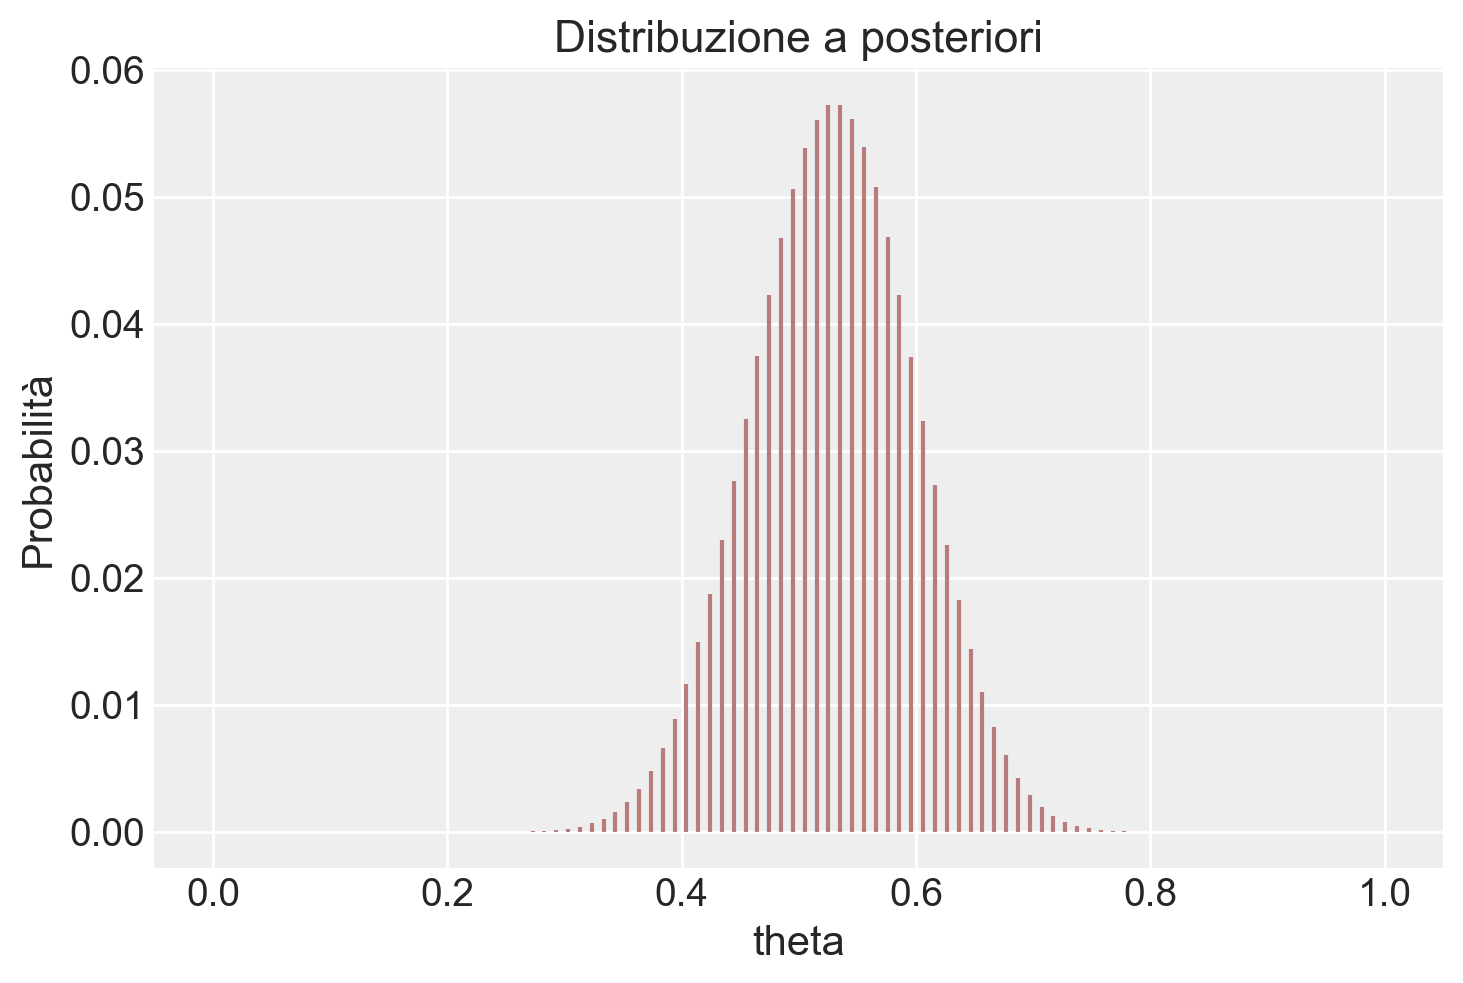

In [15]:
post = (prior * lk) / np.sum(prior * lk)

plt.vlines(theta, 0, post, color=color_fill, linestyle='-')
plt.xlabel('theta')
plt.ylabel('Probabilità')
plt.title('Distribuzione a posteriori')

plt.show()

Estraiamo un campione dalla distribuzione a posteriori.

In [15]:
samples = np.random.choice(theta, p=post, size=int(1e6), replace=True)

Troviamo la media a posteriori.

In [16]:
np.mean(samples)

0.5294427575757579

Calcoliamo la probabilità che $\theta > 0.6$.

In [17]:
np.mean(samples > 0.6)

0.15274

:::

## Principali distribuzioni coniugate

Esistono altre combinazioni di verosimiglianza e distribuzione a priori che producono una distribuzione a posteriori con la stessa forma della distribuzione a priori. Ecco alcune delle più note coniugazioni tra modelli statistici e distribuzioni a priori:

- Nel modello Normale-Normale $\mathcal{N}(\mu, \sigma^2_0)$, la distribuzione a priori è $\mathcal{N}(\mu_0, \tau^2)$ e la distribuzione a posteriori è $\mathcal{N}\left(\frac{\mu_0\sigma^2 + \bar{y}n\tau^2}{\sigma^2 + n\tau^2}, \frac{\sigma^2\tau^2}{\sigma^2 + n\tau^2} \right)$.

- Nel modello Poisson-gamma $\text{Po}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n \bar{y}, \delta +n)$.

- Nel modello esponenziale $\text{Exp}(\theta)$, la distribuzione a priori è $\Gamma(\lambda, \delta)$ e la distribuzione a posteriori è $\Gamma(\lambda + n, \delta +n\bar{y})$.

- Nel modello uniforme-Pareto $\text{U}(0, \theta)$, la distribuzione a priori è $\text{Pa}(\alpha, \varepsilon)$ e la distribuzione a posteriori è $\text{Pa}(\alpha + n, \max(y_{(n)}, \varepsilon))$.

## Riflessioni Conclusive

In conclusione, l'utilizzo di priori coniugati presenta vantaggi e svantaggi. Cominciamo con i vantaggi principali. Il principale vantaggio dell'adozione di distribuzioni a priori coniugate risiede nella loro capacità di rendere l'analisi della distribuzione a posteriori trattabile da un punto di vista analitico. Ad esempio, nel corso di questo capitolo abbiamo esaminato come sia possibile formulare la distribuzione a posteriori in seguito a un esperimento composto da una serie di prove di Bernoulli (con una verosimiglianza binomiale), utilizzando una distribuzione Beta sia per la prior che per il posteriore.

Tuttavia, è cruciale riconoscere che i modelli basati sul concetto di famiglie coniugate presentano delle limitazioni intrinseche. Le distribuzioni coniugate a priori sono disponibili solamente per distribuzioni di verosimiglianza di base e relativamente semplici. Per modelli complessi e più realistici, la ricerca di priori coniugati diventa spesso un compito estremamente arduo, limitando quindi la loro utilità. Inoltre, anche quando le distribuzioni a priori coniugate sono disponibili, un modello che ne fa uso potrebbe non essere sufficientemente flessibile per adattarsi alle nostre credenze iniziali. Ad esempio, un modello basato su una distribuzione normale è sempre unimodale e simmetrico rispetto alla media $\mu$. Tuttavia, se le nostre conoscenze iniziali non sono simmetriche o non seguono una distribuzione unimodale, la scelta di una distribuzione a priori normale potrebbe non risultare la più adeguata [@Johnson2022bayesrules].

## Esercizi

::: {#exr-conjugate-families-1}

Si consideri lo studio "*An excess of positive results: Comparing the standard psychology literature with registered reports*" di @scheel2021excess. In questo lavoro, gli autori confrontano il tasso di risultati positivi $\theta$ ottenuti in studi psicologici pubblicati senza preregistrazione con quelli pubblicati con preregistrazione. Si utilizzi il tasso di successo riportato negli studi preregistrati per costruire una distribuzione a priori per il parametro $\theta$.

Secondo i risultati degli studi preregistrati, gli autori riscontrano un tasso di successo del 43.66%, con un intervallo di confidenza al 95% [CI] = [31.91, 55.95]. Sulla base di questi dati, si costruisca una distribuzione beta come distribuzione a priori per $\theta$, seguendo il metodo illustrato da @Johnson2022bayesrules.

Successivamente, utilizzando questa distribuzione beta come distribuzione a priori, si determini la distribuzione a posteriori utilizzando il metodo delle famiglie coniugate per due scenari distinti, basati su 152 studi osservati:
(a) Un tasso di successo del 60%
(b) Un tasso di successo del 96% (come riportato per gli studi non preregistrati da @scheel2021excess).

Infine, si commentino i risultati derivanti dall'analisi delle distribuzioni a posteriori ottenute per entrambi gli scenari.

:::

::: {#exr-conjugate-families-2}

Tra i fattori che possono influenzare il rapporto tra i sessi alla nascita c'è la condizione materna di placenta previa, una condizione insolita della gravidanza in cui la placenta è impiantata in basso nell'utero, impedendo un normale parto vaginale del feto. Uno studio condotto in Germania ha esaminato il sesso dei neonati in casi di placenta previa e ha riscontrato che, su un totale di 980 nascite, 437 erano femmine.

Quanta evidenza fornisce questo studio a supporto dell'ipotesi che la proporzione di nascite femminili nella popolazione di placenta previa sia inferiore a 0.485, che rappresenta la proporzione di nascite femminili nella popolazione generale? (Esercizio tratto da @gelman1995bayesian)

:::

::: {#exr-conjugate-families-3}

Per valutare la sensibilità della soluzione precedente alla scelta della distribuzione a priori, ripetere l'esercizio utilizzando come distribuzione a priori per la proporzione di nascite femminili una distribuzione Beta(48.5, 51.5). Questa distribuzione è centrata su 0.485 e concentra la maggior parte della sua massa nell'intervallo [0.385, 0.585]. Interpretare i risultati ottenuti.

:::

::: {#exr-conjugate-families-4}

In uno studio recente, @gori2024italian hanno esaminato un campione di 202 adulti italiani e hanno riscontrato una prevalenza di mancini del 6.4%. Una meta-analisi di @papadatou2020human, condotta su un totale di 2,396,170 soggetti, riporta che la proporzione di mancini varia tra il 9.3% e il 18.1%, a seconda di come viene misurata la lateralità manuale. Inoltre, @papadatou2020human mostrano che la prevalenza della lateralità manuale varia tra i paesi e nel tempo. Considerata questa incertezza, si determini la distribuzione a posteriori che combina i dati dello studio di @gori2024italian con le informazioni pregresse fornite da Papadatou-Pastou et al. (2020). Le informazioni di @papadatou2020human possono essere espresse in termini di una distribuzione Beta(8, 60).

:::

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [18]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Thu Jul 25 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

numpy     : 1.26.4
arviz     : 0.18.0
scipy     : 1.14.0
matplotlib: 3.9.1

Watermark: 2.4.3

